                                Final Project
Project Overview:

The purpose of this project is to see the relationship between price level and unemployment rate for the entire U.S. The macroeconomics theory states that there is a tradeoff between price level and unemployment rate. In this project, we have time series data of price level and unemployment rate for the U.S. We will use linear regression analysis to test this theory. 





Project Structure:

The project will start by providing a data report. The data report will explain where the data comes from and how to access the data.

The second part of the project will provide summary statistics about CPI and unemployment rate trends and provide visualizations of these statistics to help further illustrate the project.  
The third part of the project will state a hypothesis and compared with trends in previous scholarship.  Then, a linear regression will be performed to test the hypothesis and the results will be stated.  Lastly, there will be a detailed discussion of the results and how it follows or goes against previous scholarship.

Data Report:

The data for this project comes from the Federal Reserve Economic Data website (FRED).  FRED provides monthly data on both the U.S. CPI and unemployment rate from 1948 onward, and it identifies times of periods of economic contraction. The data can be accessed at https://fred.stlouisfed.org.

Key Variables:

The two key variables of this project are CPI and unemployment rate. FRED defines CPI as the following:
    "The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housing units and approximately 26,000 retail establishments across 87 urban areas. To calculate the index, price changes are averaged with weights representing their importance in the spending of the particular group. The index measures price changes (as a percent change) from a predetermined reference date. In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted CPI, which removes the effects of seasonal changes, such as weather, school year, production cycles, and holidays."

FRED defines unemployment rate as the following:
    "The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces."

In [1]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col



In [2]:
#Access Data
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [3]:
data.columns=['DATE','URATE']

In [4]:
data.head()

,DATE,URATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [5]:
#Summary Statistics for Unemployment Rate
data.describe()

,URATE
count,872.000000
mean,5.760550
std,1.708056
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.700000


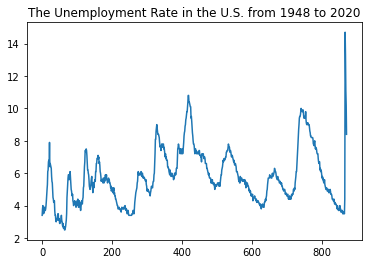

In [6]:
#Graphing the Unemployment Rate
data['URATE'].plot(title="The Unemployment Rate in the U.S. from 1948 to 2020")

In [16]:
#Access Data
url_c = 'http://research.stlouisfed.org/fred2/series/CPIAUCSL/downloaddata/CPIAUCSL.csv'
data_c = pd.read_csv(url_c, parse_dates=True)
data_c.head()

,DATE,VALUE
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [17]:
data_c.columns=['DATE', 'CPI']
data_c.head()

,DATE,CPI
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [18]:
#Summary Statistics for CPI
data_c.describe()

,CPI
count,883.000000
mean,111.274795
std,78.513275
min,21.480000
25%,31.515000
50%,100.800000
75%,178.300000
max,259.050000


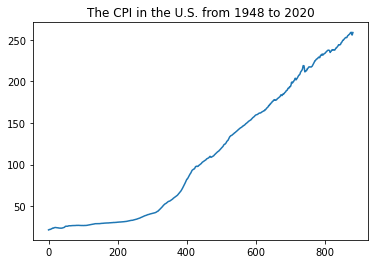

In [19]:
#Graphing CPI
data_c['CPI'].plot(title="The CPI in the U.S. from 1948 to 2020")

In [20]:
data_merge=pd.merge(data, data_c, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [21]:
data_merge.head()

,DATE,URATE,CPI
0,1948-01-01,3.4,23.68
1,1948-02-01,3.8,23.67
2,1948-03-01,4.0,23.50
3,1948-04-01,3.9,23.82
4,1948-05-01,3.5,24.01


Regression Analysis:

We will use the regression analysis to test our hypothesis. According to economic theory, there is a trade off between CPI and unemployment rate which means that there will be a negative relationship between these two variables. We will use linear regression analysis to test this hypothesis.